In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import sys
sys.path.insert(0, os.getcwd() + '/code')
from viz import *
from helper_functions import * 

In [2]:
df_game = pd.read_csv("data/games.csv")
df_tracking = pd.read_csv("data/week1.csv")
df_tracking = compute_orientation(df_tracking)
df_play = pd.read_csv("data/plays.csv")
df_players = pd.read_csv("data/players.csv")
df_pffScoutingData = pd.read_csv("data/pffScoutingData.csv")

In [3]:
animate_play(df_tracking,df_play,df_players,df_pffScoutingData,2021090900, 97, displayZone=True, displayOrientations=False).show()

 PlayId : 97 - (13:33) (Shotgun) T.Brady pass incomplete deep right to C.Godwin.
 PlayId : 97 - (13:33) (Shotgun) T.Brady pass incomplete deep right to C.Godwin.


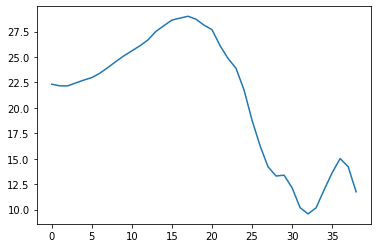

 PlayId : 137 - (13:18) (Shotgun) D.Prescott pass deep left to A.Cooper pushed ob at DAL 30 for 28 yards (A.Winfield).
 PlayId : 137 - (13:18) (Shotgun) D.Prescott pass deep left to A.Cooper pushed ob at DAL 30 for 28 yards (A.Winfield).


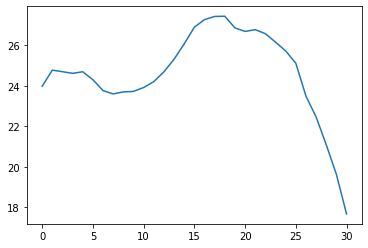

 PlayId : 187 - (12:23) (Shotgun) D.Prescott pass short middle to D.Schultz to DAL 39 for 5 yards (D.White).
 PlayId : 187 - (12:23) (Shotgun) D.Prescott pass short middle to D.Schultz to DAL 39 for 5 yards (D.White).


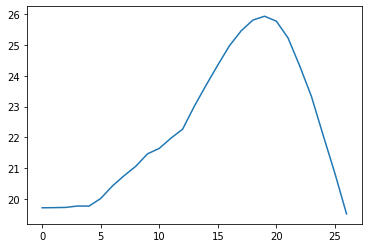

 PlayId : 282 - (9:56) D.Prescott pass incomplete deep left to C.Lamb.
 PlayId : 282 - (9:56) D.Prescott pass incomplete deep left to C.Lamb.


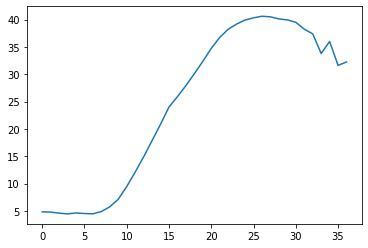

 PlayId : 349 - (9:46) (Shotgun) D.Prescott pass incomplete short left to C.Lamb [L.David].
 PlayId : 349 - (9:46) (Shotgun) D.Prescott pass incomplete short left to C.Lamb [L.David].


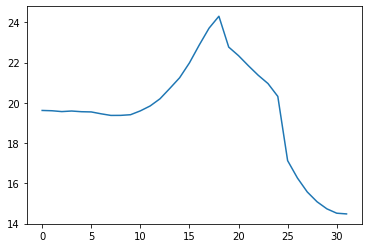

 PlayId : 410 - (8:53) (Shotgun) T.Brady pass short middle to M.Evans to TB 21 for 10 yards (T.Diggs).
 PlayId : 410 - (8:53) (Shotgun) T.Brady pass short middle to M.Evans to TB 21 for 10 yards (T.Diggs).


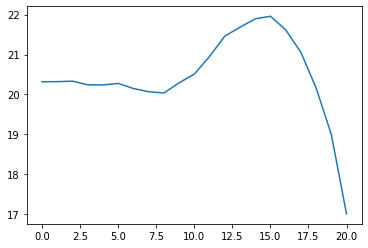

 PlayId : 434 - (8:24) (No Huddle, Shotgun) T.Brady pass incomplete short left to M.Evans.


UndefinedVariableError: name 'nan' is not defined

In [4]:
gameId = 2021090900
playId = 97

playIds = df_play[df_play.gameId==gameId].playId.unique()
playIds.sort()
for playId in playIds:
    selected_play_df = df_play[(df_play.playId==playId)&(df_play.gameId==gameId)].copy()    
    tracking_players_df = pd.merge(df_tracking,df_players,how="left",on = "nflId")
    tracking_players_df = pd.merge(tracking_players_df,df_pffScoutingData,how="left",on = ["nflId","playId","gameId"])
    selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()
    line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
    playDescription = selected_play_df.playDescription.values[0]
    print(f" PlayId : {playId} - {playDescription}")
    # Calcul attaquant battu ?
    selected_tracking_df = beaten_by_defender(gameId, playId, df_pffScoutingData, selected_tracking_df, seuil = 0.5)
    sorted_frame_list = selected_tracking_df.frameId.unique()
    sorted_frame_list.sort()
    
    line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
    playDescription = selected_play_df.playDescription.values[0]
    print(f" PlayId : {playId} - {playDescription}")
    aire_t = list()
    if 'pass_forward' in selected_tracking_df.event.unique():
        eventFrame = selected_tracking_df[selected_tracking_df.event == 'pass_forward'].iloc[0].frameId
    else :
        eventFrame = 1000
    for frameId in sorted_frame_list:
        if eventFrame == frameId :
            break
        selected_frame_df = selected_tracking_df[selected_tracking_df.frameId == frameId]
        offensive_points = get_Oline_position(selected_frame_df)
        defensive_points = get_Dline_position(selected_frame_df)
        points = pd.concat([offensive_points, defensive_points])
        QB_zone = calculate_Oline_zones(offensive_points, line_of_scrimmage)
        region_polys, region_pts, players_points = calculate_voronoi_zones(QB_zone, offensive_points, defensive_points)
        aire_t.append(pocketArea(region_polys, region_pts, players_points))

    plt.plot(aire_t)
    plt.show()
    

30.5